# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [214]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from scipy import stats as st

In [215]:
geo_data_0=pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1=pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2=pd.read_csv('/datasets/geo_data_2.csv')

#### Посмотрим на данные в geo_data_0

In [216]:
display(geo_data_0.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [217]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [218]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [219]:
geo_data_0.duplicated().sum()

0

In [220]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Данные в geo_data_0 чисты!

#### Посмотрим на данные в geo_data_1

In [221]:
display(geo_data_1.head())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [222]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [223]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [224]:
geo_data_1.duplicated().sum()

0

In [225]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

C данными в geo_data_1 тоже все хорошо! :)

#### Посмотрим на данные в geo_data_2

In [226]:
display(geo_data_2.head())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [227]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [228]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [229]:
geo_data_2.duplicated().sum()

0

In [230]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Все красиво :*

#### Посмотрим на распределение сырья в каждом из регионов

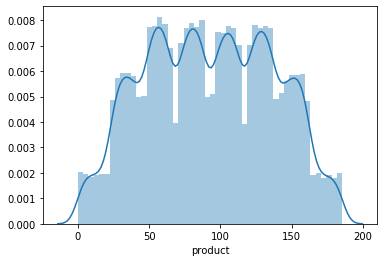

In [231]:
#распределение сырья в 1 регионе
sns.distplot(geo_data_0['product'])

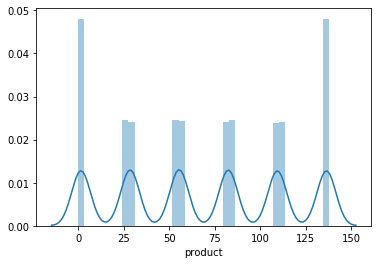

In [232]:
#распределение сырья в 2 регионе
sns.distplot(geo_data_1['product'])

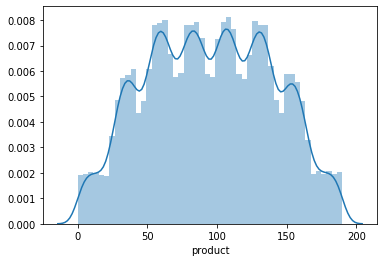

In [233]:
#распределение сырья в 3 регионе
sns.distplot(geo_data_2['product'])

Видно, что во всех регионах распределение не нормальное.

#### Разобъём данные на 2 выборки, обучающую и валидационную.

In [234]:
#для начала избавимся от лишней информации в данных
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [235]:
features_1=geo_data_0.drop(['product'],axis=1)
target_1=geo_data_0['product']

features_2=geo_data_1.drop(['product'],axis=1)
target_2=geo_data_1['product']

features_3=geo_data_2.drop(['product'],axis=1)
target_3=geo_data_2['product']

train_features_1,valid_features_1,train_target_1,valid_target_1=train_test_split(features_1,target_1,test_size=.25,random_state=12345)
train_features_2,valid_features_2,train_target_2,valid_target_2=train_test_split(features_2,target_2,test_size=.25,random_state=12345)
train_features_3,valid_features_3,train_target_3,valid_target_3=train_test_split(features_3,target_3,test_size=.25,random_state=12345)


# 2. Обучение и проверка модели

In [236]:
#напишем функцию обучающую моделью линейной регрессии и находящее средний запас сырья, rmse, mae
def regression(features_train, features_valid, target_train,target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    mean = predicted_valid.mean()
    rmse = np.sqrt(mean_squared_error(predicted_valid, target_valid))
    mae = mean_absolute_error(predicted_valid, target_valid)
    return mean, rmse, mae

check_1 = regression(train_features_1,valid_features_1,train_target_1,valid_target_1)
print('check1', check_1)
check_2 = regression(train_features_2,valid_features_2,train_target_2,valid_target_2)
print('check2', check_2)
check_3 = regression(train_features_3,valid_features_3,train_target_3,valid_target_3)
print('check3', check_3)



check1 (92.59256778438038, 37.5794217150813, 30.919600777151313)
check2 (68.728546895446, 0.893099286775616, 0.718766244212475)
check3 (94.96504596800489, 40.02970873393434, 32.792652105481814)


# 3. Подготовка к расчёту прибыли

In [237]:
#исходные данные задачи
N=500 # количество точек
best_n = 200 # лучшие
budget = 10**10 # бюджет на разработку скважин в регионе
burrel_income_per_1 = 450 # доход с каждой единицы (в тыс.рублях)

In [238]:
drill_cost = budget / best_n # стоимоть бурения 1 скважины
min_product = drill_cost / burrel_income_per_1 
print('Минимальный объем сырья в месторождениях региона, достаточный для разработки', min_product / 1000, 'тыс.бареллей')


Минимальный объем сырья в месторождениях региона, достаточный для разработки 111.11111111111111 тыс.бареллей


In [239]:
result1={'geo_data_0':check_1,'geo_data_1':check_2,'geo_data_2':check_3}
rezult_df=pd.DataFrame(result1,index=['mean','rmse','mae'])
display(rezult_df)

,geo_data_0,geo_data_1,geo_data_2
mean,92.592568,68.728547,94.965046
rmse,37.579422,0.893099,40.029709
mae,30.919601,0.718766,32.792652


Таким образом, среднего запаса сырья во всех рассматриваемых месторождениях достаточно для разработки. По приведенной выше (конец 2 пункта) таблице видно, что среднеквадратичная ошибка предсказания и целевого признака 2 месторождения меньше 1, можем сделать вывод,что предсказание geo_data_1 лучшее, а остальные предсказаны с большой ошибкой. Также, эта ошибка может являться причиной существенной разницы в запасах сырья в регионах.

# 4. Расчёт прибыли и рисков 

In [240]:
#функция для расчета прибыли
#def profit(data):
    #profit=[]
    #profit.append((data * 1000 * burrel_income_per_1) / 1000000) # умножаем запас сырья на цена за барелль 
    #return np.mean(profit)  # возвращаем сумму прибыли
    
def revenue(target, prediction, n):
    preds_sorted = prediction.sort_values(ascending=False)
    selected = target[preds_sorted.index].head(n)
    return (burrel_income_per_1 * 1000 * selected.sum() - budget) / 1000000 

In [242]:
#функция предсказания
def prediction(features_train, features_valid, target_train, target_valid):
    features_train = features_train.reset_index(drop=True)
    features_valid = features_valid.reset_index(drop=True)
    target_train = target_train.reset_index(drop=True)
    target_valid = target_valid.reset_index(drop=True)
    model = LinearRegression()
    model.fit(features_train, target_train)
    return model.predict(features_valid)

prediction_1 = prediction(train_features_1,valid_features_1,train_target_1,valid_target_1)
prediction_2 = prediction(train_features_2,valid_features_2,train_target_2,valid_target_2)
prediction_3 = prediction(train_features_3,valid_features_3,train_target_3,valid_target_3)

prediction_1=pd.Series(prediction_1)
valid_target_1=pd.Series(valid_target_1).reset_index(drop=True)

prediction_2=pd.Series(prediction_2)
valid_target_2=pd.Series(valid_target_2).reset_index(drop=True)

prediction_3=pd.Series(prediction_3)
valid_target_3=pd.Series(valid_target_3).reset_index(drop=True)

In [243]:
state = np.random.RandomState(12345)

In [244]:
#Bootstrap
values_1=[]
values_2=[]
values_3=[]

for i in range(1000):
    
    # Делаю выборку по 500 точек 1-ого региона
    target_subsample_1=valid_target_1.sample(n=N,random_state=state,replace=True)
    predict_subsample_1=prediction_1[target_subsample_1.index]
    sum_target_predict_1=pd.concat([target_subsample_1,predict_subsample_1])
    
    # Делаю выборку по 500 точек 2-ого региона
    target_subsample_2=valid_target_2.sample(n=N,random_state=state,replace=True)
    predict_subsample_2=prediction_2[target_subsample_2.index]
    sum_target_predict_2=pd.concat([target_subsample_2,predict_subsample_2])
    
    
    # Делаю выборку по 500 точек 3-ого региона
    target_subsample_3=valid_target_3.sample(n=N,random_state=state,replace=True)
    predict_subsample_3=prediction_3[target_subsample_3.index]
    sum_target_predict_3=pd.concat([target_subsample_3,predict_subsample_3])
   
    # подсчет прибыли и рисков вызовом функций
    values_1.append(np.mean(revenue(target_subsample_1, predict_subsample_1,best_n)))
    values_2.append(np.mean(revenue(target_subsample_2, predict_subsample_2,best_n))) 
    values_3.append(np.mean(revenue(target_subsample_3, predict_subsample_3,best_n)))
    
values_1 = pd.Series(values_1)
values_2 = pd.Series(values_2)
values_3 = pd.Series(values_3)


In [245]:
def new_inform(values):
    mean = values.mean() # средняя прибыль месторождения
    confidence_interval =[]
    confidence_interval =st.t.interval(0.95, df=len(values)-1, loc=mean, scale =values.sem()) #95%-ый доверительный интервал:
    lower =values.quantile(0.025) # 2.5% квантиль
    upper = values.quantile(0.975) # 97.5% квантиль
    demage = len(values[values < 0])  * 100 / len(values)
    return mean, confidence_interval, lower, upper,  demage
    

In [246]:
#Регион1
region_1 = new_inform(values_1)
region_2 = new_inform(values_2)
region_3 = new_inform(values_3)

result2={'geo_data_0':region_1,'geo_data_1':region_2,'geo_data_2':region_3}
new_result_df=pd.DataFrame(result2,index=['Средняя прибыль, млн.руб','Доверительный интервал 95%','2.5% квантиль','97.5% квантиль','Риск убытков, %'])
display(new_result_df)

,geo_data_0,geo_data_1,geo_data_2
"Средняя прибыль, млн.руб",414.736,513.172,410.198
Доверительный интервал 95%,"(396.761398623867, 432.71113860505585)","(499.74865131434774, 526.5956873736731)","(392.3145990014438, 428.082203546592)"
2.5% квантиль,-123.528,85.3297,-140.424
97.5% квантиль,968.563,940.106,967.716
"Риск убытков, %",7,0.9,8.5


### Вывод

Из полученной таблицы видим, что на 1 месте-2 регион со средней прибылью в 513 млн. и риском убытков в 0.9% , на 2 месте - 1 регион со средней прибылью в 414 млн. и риском в 7%, на 3 - 3 регион со средней прибылью в 410 млн. и риском - 8.5% 

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован